In [ ]:
# Run the below command to install Poppler in Linux environment
%sudo apt-get install -y poppler-utils
# For Windows OS, download Poppler for Windows from https://github.com/oschwartz10612/poppler-windows/releases/download/v24.08.0-0/Release-24.08.0-0.zip
# Install Byaldi and dependencies
%pip install byaldi pdf2image qwen-vl-utils transformers matplotlib
# Install PyTorch with support for Intel GPUs
%pip install "torch==2.6.0+xpu" "torchvision==0.21.0+xpu" "torchaudio==2.6.0+xpu" --index-url https://download.pytorch.org/whl/xpu

In [1]:
from byaldi import RAGMultiModalModel
import torch
from generate_data import convert_pdfs_to_images
import matplotlib.pyplot as plt

c:\Users\rameshpe\OneDrive - Intel Corporation\Documents\Work\CASE-CAT\University_Curriculum_Chatbot\mmrag_pdf\byaldi\byaldi_venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
docs_retrieval_model = RAGMultiModalModel.from_pretrained("vidore/colpali-v1.2",device=torch.device("xpu"))
docs_retrieval_model.index(
    input_path="test/", index_name="image_index", store_collection_with_index=False, overwrite=True
)

Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]


overwrite is on. Deleting existing index image_index to build a new one.
Indexing file: test\Gaudi3.pdf
Added page 1 of document 0 to index.
Added page 2 of document 0 to index.
Added page 3 of document 0 to index.
Added page 4 of document 0 to index.
Added page 5 of document 0 to index.
Added page 6 of document 0 to index.
Added page 7 of document 0 to index.
Added page 8 of document 0 to index.
Added page 9 of document 0 to index.
Added page 10 of document 0 to index.
Added page 11 of document 0 to index.
Added page 12 of document 0 to index.
Added page 13 of document 0 to index.
Added page 14 of document 0 to index.
Added page 15 of document 0 to index.
Added page 16 of document 0 to index.
Added page 17 of document 0 to index.
Added page 18 of document 0 to index.
Added page 19 of document 0 to index.
Added page 20 of document 0 to index.
Added page 21 of document 0 to index.
Added page 22 of document 0 to index.
Added page 23 of document 0 to index.
Added page 24 of document 0 to 

{0: 'test\\Gaudi3.pdf'}

In [4]:
#all_images = convert_pdfs_to_images("test/")
text_query = "What are the floating data types supported by Intel Gaudi 3 AI accelerator?"
results = docs_retrieval_model.search(text_query, k=3)

In [5]:
print(results)

[{'doc_id': 0, 'page_num': 11, 'score': 22.875, 'metadata': {}, 'base64': None}, {'doc_id': 0, 'page_num': 15, 'score': 20.625, 'metadata': {}, 'base64': None}, {'doc_id': 0, 'page_num': 14, 'score': 20.375, 'metadata': {}, 'base64': None}]


In [6]:
def get_grouped_images(results, all_images):
    grouped_images = []

    for result in results:
        doc_id = result["doc_id"]
        page_num = result["page_num"]
        grouped_images.append(
            all_images[doc_id][page_num - 1]
        )  

    return grouped_images

In [7]:
all_images = convert_pdfs_to_images("test/")
grouped_images = get_grouped_images(results, all_images)

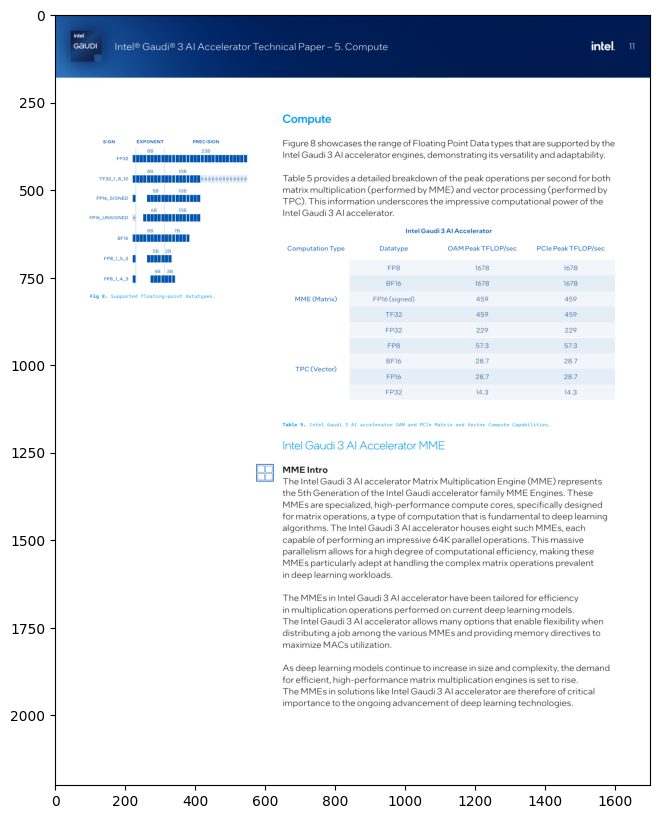

In [8]:
plt.subplots(1, 1, figsize=(15, 10))
plt.imshow(grouped_images[0])

In [24]:
from PIL import Image
grouped_images[0].save("retrieved_img.png")